In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv("student_data.csv")

In [15]:
df.shape

(395, 33)

In [16]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

**Descriptive Statistics (Numerical Summary)**

In [18]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


Age ranges roughly from 15 to 22 years

Study time mostly lies between 1 and 3

Failures median is 0 → most students have no failures

Final grade (G3) mean is around mid-range → average academic performance

In [19]:
df.describe(include="object")

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263


**Compute Missing Value % for Each Column**

In [20]:
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100
missing_table = pd.DataFrame({
    "Missing Values": missing_count,
    "Percentage": missing_percent
})
missing_table = missing_table.sort_values(by="Percentage", ascending=False)
missing_table


,Missing Values,Percentage
school,0,0.0
sex,0,0.0
age,0,0.0
address,0,0.0
famsize,0,0.0
Pstatus,0,0.0
Medu,0,0.0
Fedu,0,0.0
Mjob,0,0.0
Fjob,0,0.0


All columns have complete data, no missing values found. Dataset is clean in terms of missing data

**Plot Distributions for Numeric Columns**

In [21]:
numeric_cols = df.select_dtypes(include=np.number).columns
numeric_cols

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

**Plot histograms**

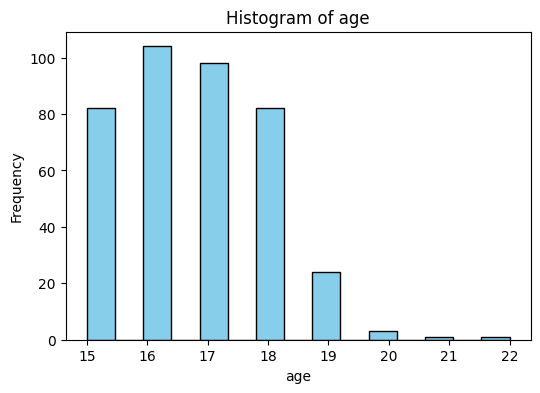

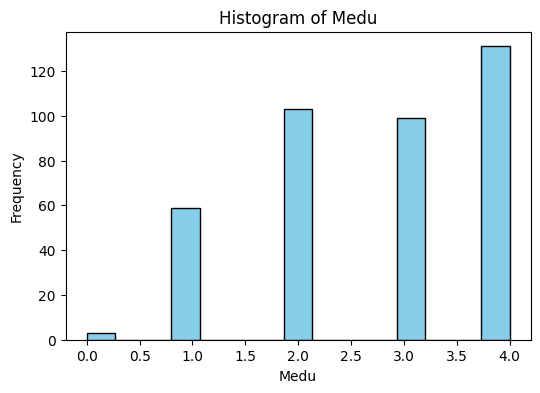

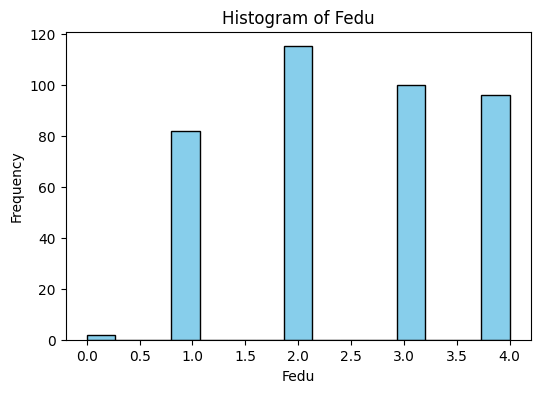

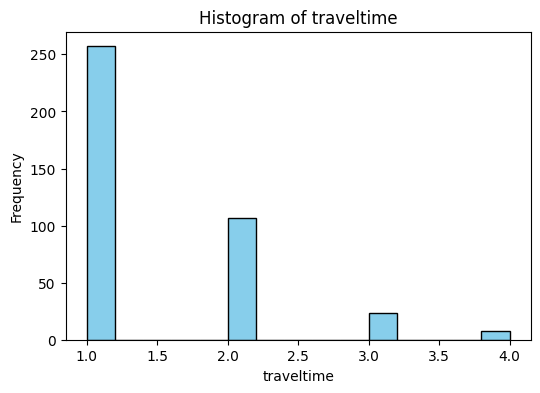

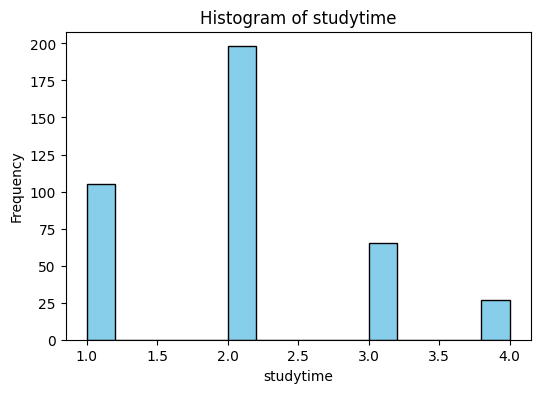

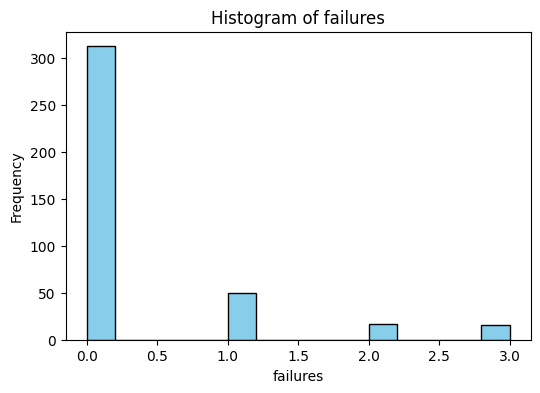

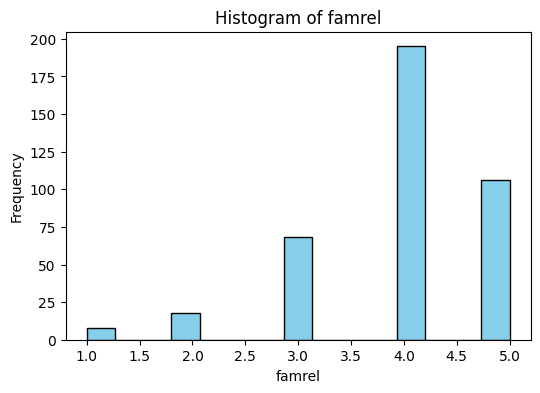

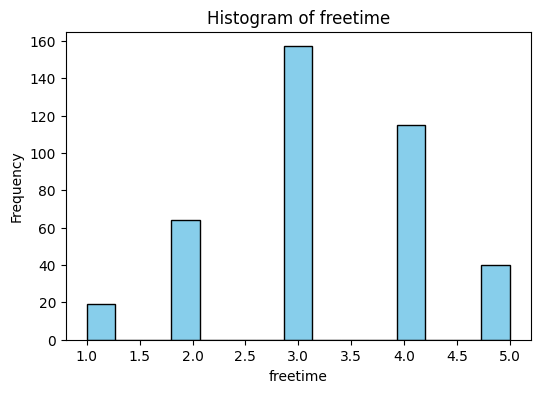

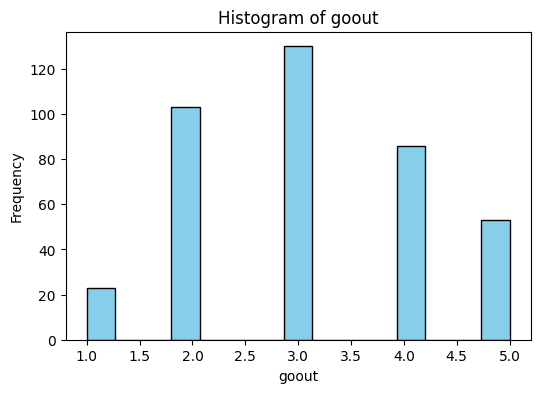

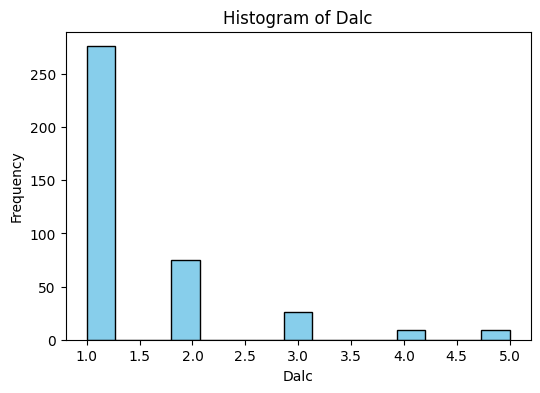

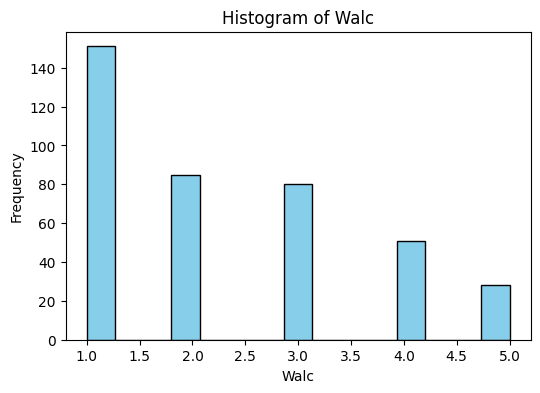

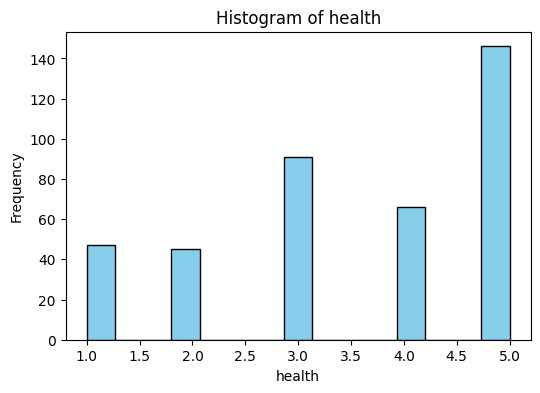

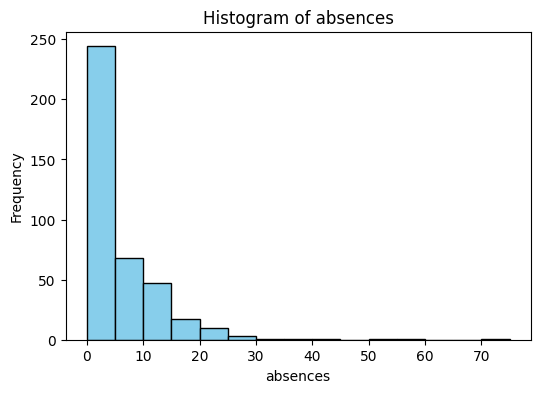

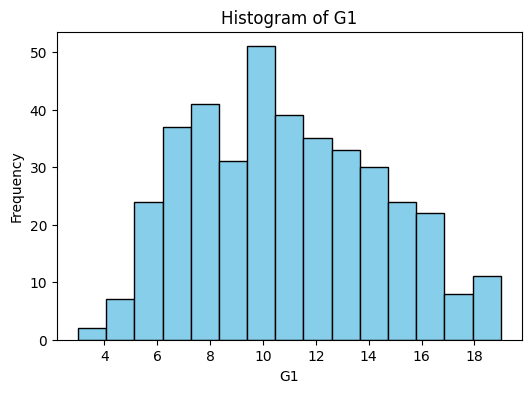

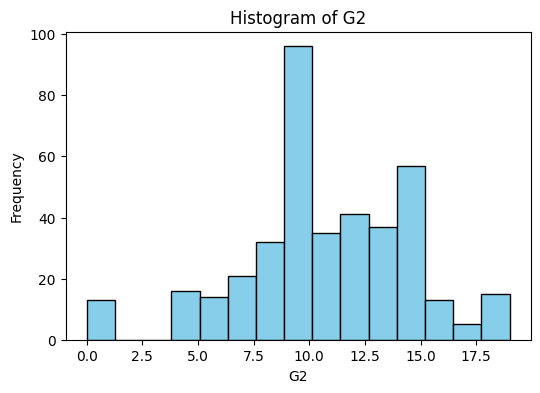

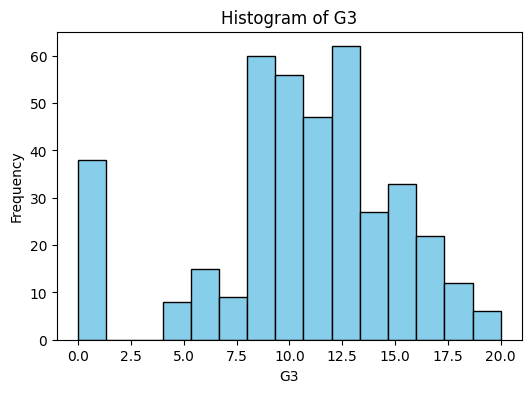

In [22]:
import matplotlib.pyplot as plt
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    plt.hist(df[col], bins=15, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

**Plot boxplots**

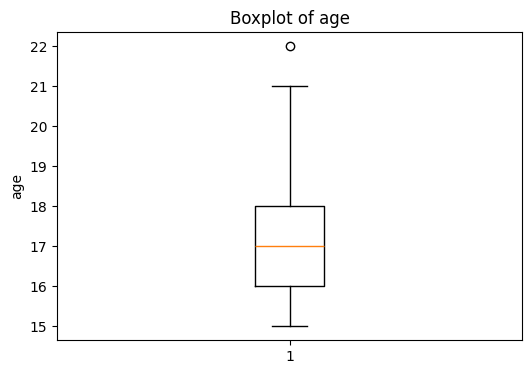

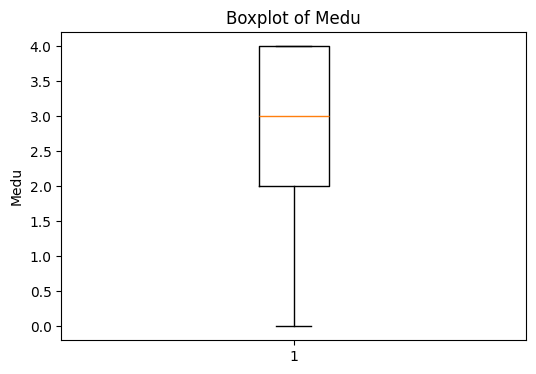

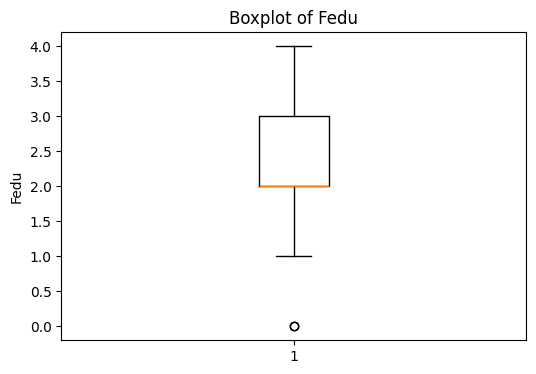

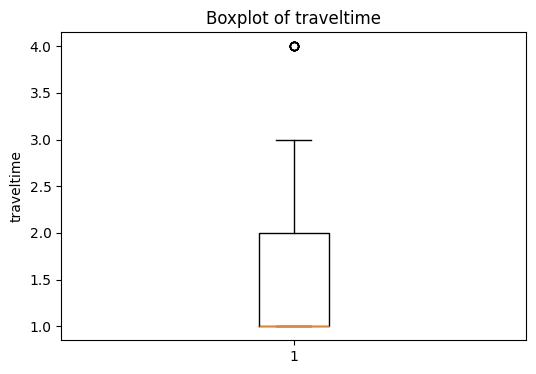

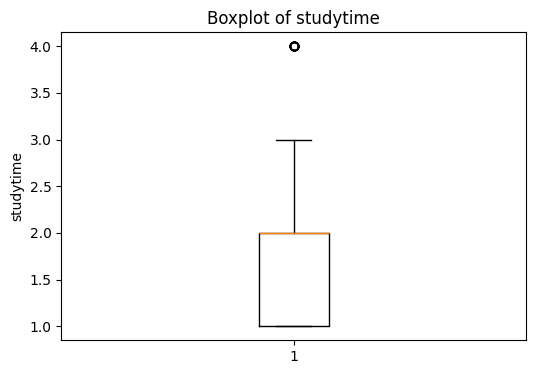

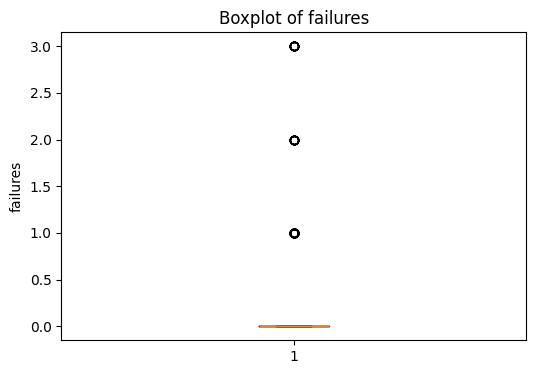

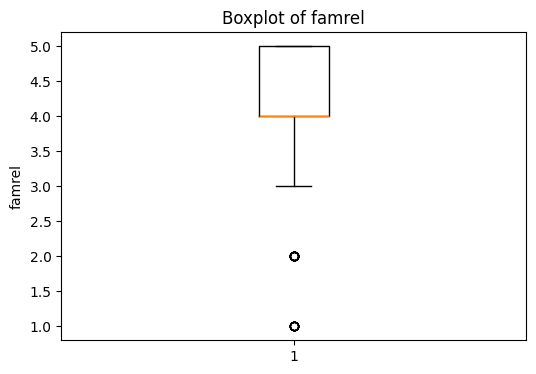

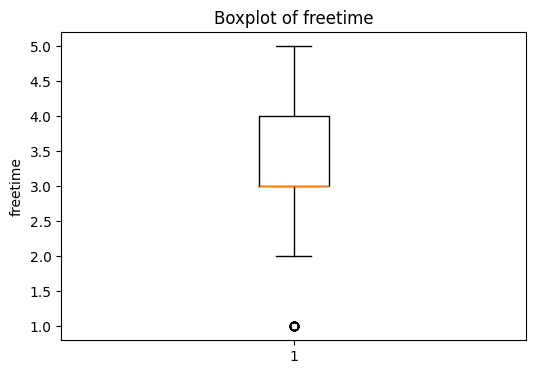

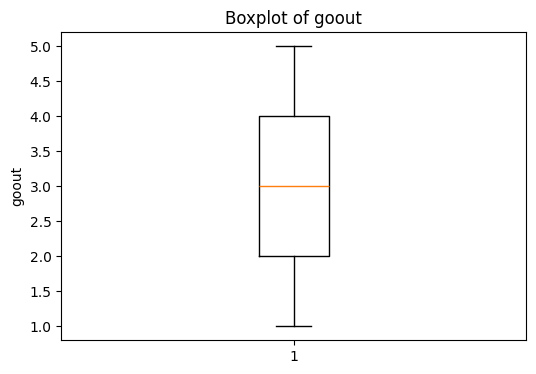

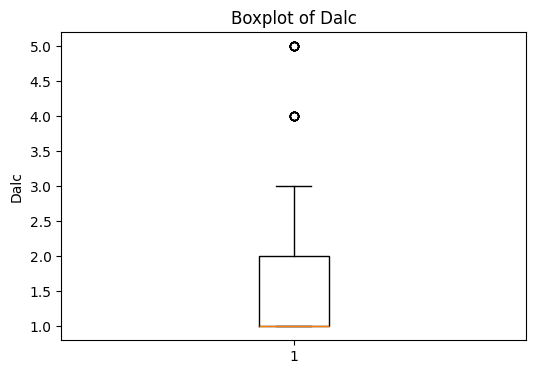

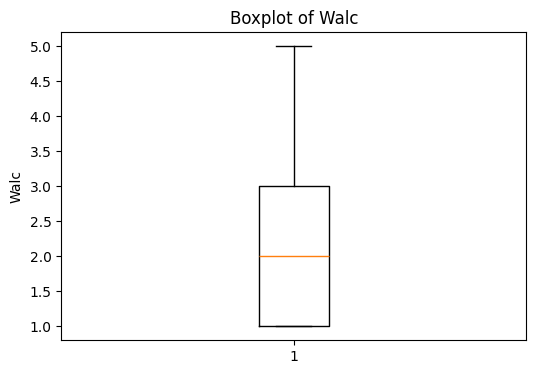

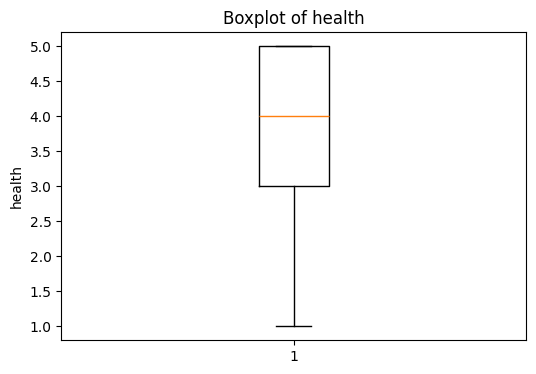

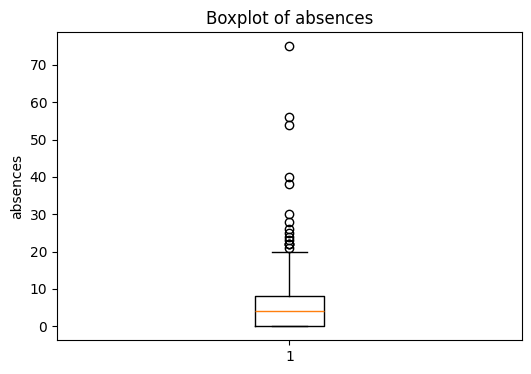

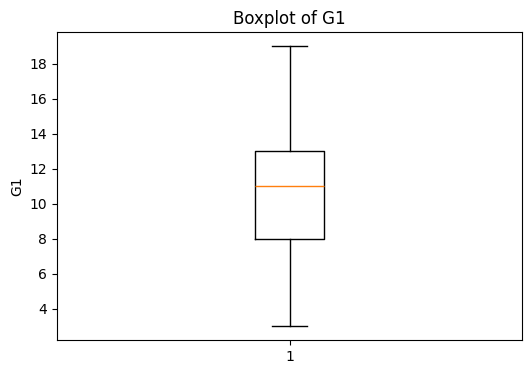

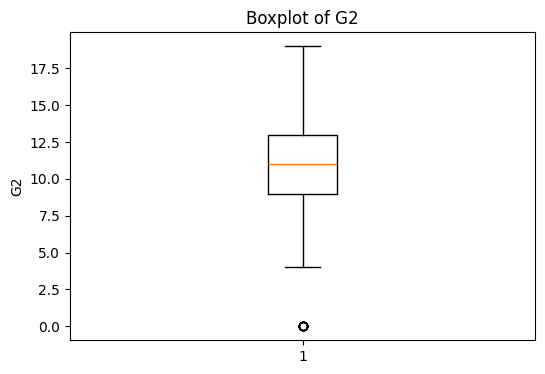

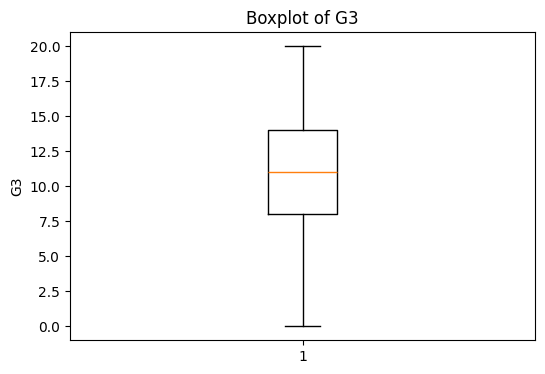

In [23]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    plt.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

**Outlier Detection (IQR Method)**

In [24]:
numeric_cols = df.select_dtypes(include=np.number).columns
outlier_indices = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)].index
    outlier_indices[col] = outliers
    print(f"{col}: {len(outliers)} outliers")


age: 1 outliers
Medu: 0 outliers
Fedu: 2 outliers
traveltime: 8 outliers
studytime: 27 outliers
failures: 83 outliers
famrel: 26 outliers
freetime: 19 outliers
goout: 0 outliers
Dalc: 18 outliers
Walc: 0 outliers
health: 0 outliers
absences: 15 outliers
G1: 0 outliers
G2: 13 outliers
G3: 0 outliers


**Create Outlier Flag Column**

In [25]:
def outlier_flag(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((series < lower) | (series > upper)).astype(int)


In [27]:
for col in numeric_cols:
    df[col + '_outlier'] = outlier_flag(df[col])

In [28]:
df[['G3', 'G3_outlier']].head(10)

,G3,G3_outlier
0,6,0
1,6,0
2,10,0
3,15,0
4,10,0
5,15,0
6,11,0
7,6,0
8,19,0
9,15,0


**Handle Outliers**( Cap outliers using IQR)

In [29]:
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    series_capped = series.copy()
    series_capped[series < lower] = lower
    series_capped[series > upper] = upper
    return series_capped

In [32]:
df[['G3', 'G3_outlier', 'G3_capped']].head(10)

,G3,G3_outlier,G3_capped
0,6,0,6
1,6,0,6
2,10,0,10
3,15,0,15
4,10,0,10
5,15,0,15
6,11,0,11
7,6,0,6
8,19,0,19
9,15,0,15


**Correlation Matrix & Interpretation**

In [33]:
capped_cols = [col for col in df.columns if col.endswith('_capped')]
corr_matrix = df[capped_cols].corr()
corr_matrix


,age_capped,Medu_capped,Fedu_capped,traveltime_capped,studytime_capped,failures_capped,famrel_capped,freetime_capped,goout_capped,Dalc_capped,Walc_capped,health_capped,absences_capped,G1_capped,G2_capped,G3_capped
age_capped,1.000000,-0.165357,-0.164877,0.080078,0.012185,NaN,0.050074,0.018784,0.124521,0.126195,0.113949,-0.058976,0.191689,-0.061603,-0.156858,-0.161747
Medu_capped,-0.165357,1.000000,0.625981,-0.170070,0.068544,NaN,0.017352,0.027325,0.064094,0.019102,-0.047123,-0.046878,0.113815,0.205341,0.227566,0.217147
Fedu_capped,-0.164877,0.625981,1.000000,-0.156097,0.009151,NaN,0.009227,-0.017812,0.042034,0.002729,-0.015043,0.012193,0.016966,0.191974,0.179514,0.154527
traveltime_capped,0.080078,-0.170070,-0.156097,1.000000,-0.114884,NaN,-0.011521,-0.023756,0.017766,0.115733,0.119278,0.002983,-0.023802,-0.088489,-0.141894,-0.117659
studytime_capped,0.012185,0.068544,0.009151,-0.114884,1.000000,NaN,0.059369,-0.141054,-0.065701,-0.219032,-0.260464,-0.071032,-0.080719,0.162914,0.134288,0.099024
failures_capped,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
famrel_capped,0.050074,0.017352,0.009227,-0.011521,0.059369,NaN,1.000000,0.141845,0.064131,-0.069358,-0.114698,0.080929,-0.080251,0.026786,0.004531,0.058354
freetime_capped,0.018784,0.027325,-0.017812,-0.023756,-0.141054,NaN,0.141845,1.000000,0.281769,0.205032,0.146665,0.075318,0.007181,0.007524,-0.011653,0.008719
goout_capped,0.124521,0.064094,0.042034,0.017766,-0.065701,NaN,0.064131,0.281769,1.000000,0.266818,0.420386,-0.009577,0.105672,-0.149104,-0.157180,-0.132791
Dalc_capped,0.126195,0.019102,0.002729,0.115733,-0.219032,NaN,-0.069358,0.205032,0.266818,1.000000,0.658956,0.080359,0.146541,-0.101402,-0.087085,-0.066432


**Visualize correlation (heatmap)**

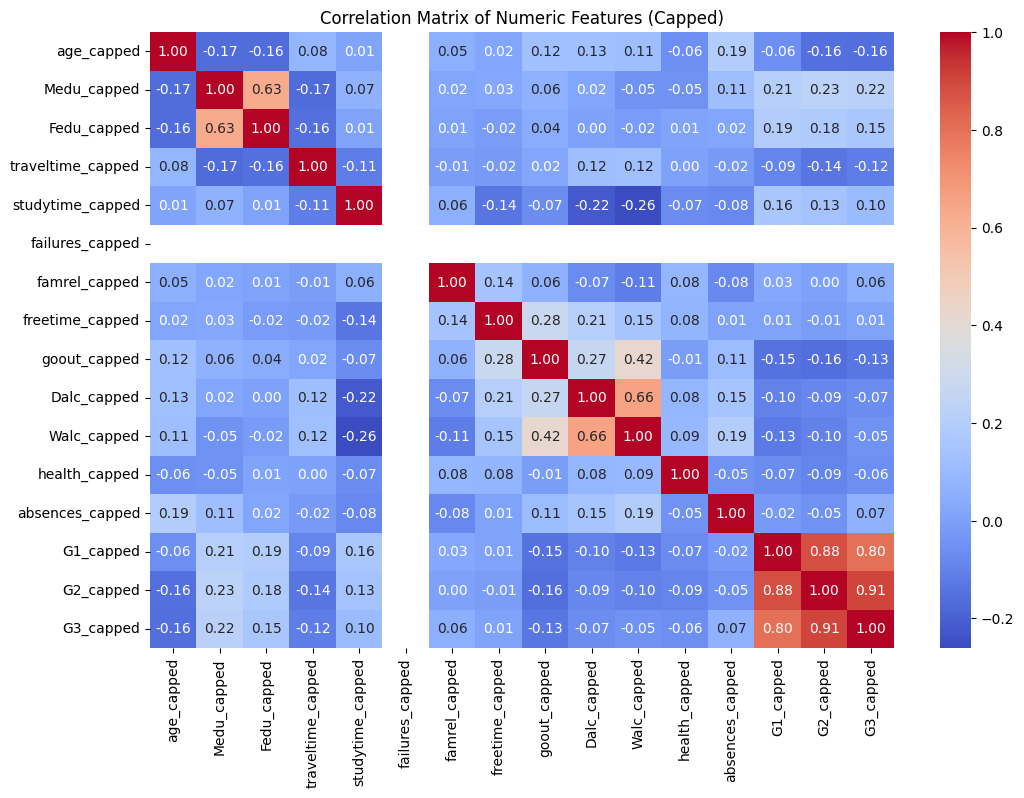

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Features (Capped)")
plt.show()


In [35]:
final_cols = list(df.columns)
final_cols = [col for col in final_cols if not col.endswith('_outlier')]
cleaned_df = df[final_cols]


In [36]:
cleaned_df.to_csv("cleaned_dataset.csv", index=False)